In [5]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import json
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.client import device_lib

In [6]:
run_name = 'firstTest'
data_dir = './images/'
data_dir = pathlib.Path(data_dir).with_suffix('')

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"\nTotal Number of Images: {image_count}")


Total Number of Images: 5864


In [9]:
batch_size = 64
img_height = 150
img_width = 150

print('\nCollecting Training Data...')
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
    
print('\nCollecting Validation Data...')

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)
    
class_names = train_ds.class_names
print('\n Class Names:\n', class_names)


Found 5864 files belonging to 100 classes.
Using 4692 files for training.

Found 5864 files belonging to 100 classes.
Using 1172 files for validation.

 Class Names:
 ['001.Black_footed_Albatross', '002.Laysan_Albatross', '003.Sooty_Albatross', '004.Groove_billed_Ani', '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet', '008.Rhinoceros_Auklet', '009.Brewer_Blackbird', '010.Red_winged_Blackbird', '011.Rusty_Blackbird', '012.Yellow_headed_Blackbird', '013.Bobolink', '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting', '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird', '020.Yellow_breasted_Chat', '021.Eastern_Towhee', '022.Chuck_will_Widow', '023.Brandt_Cormorant', '024.Red_faced_Cormorant', '025.Pelagic_Cormorant', '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper', '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo', '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo', '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch', '036.Nort

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
            
num_classes = len(class_names)

model = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
    
model.summary()

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

epochs=50

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 150, 150, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 150, 150, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                      

In [11]:
start = time.time()
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[callback]
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
history.history['training_time'] = time.time() - start

with open(run_name + '.json', 'w') as outfile:
    json.dump(history.history, outfile)

print(f"Validation Accuracy: {val_acc}")

Epoch 1/50


2024-12-11 14:21:14.225490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4692]
	 [[{{node Placeholder/_4}}]]
2024-12-11 14:21:14.227195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4692]
	 [[{{node Placeholder/_4}}]]


74/74 [==============================] - ETA: 0s - loss: 4.5933 - accuracy: 0.0119

2024-12-11 14:22:01.490403: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1172]
	 [[{{node Placeholder/_4}}]]
2024-12-11 14:22:01.490898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1172]
	 [[{{node Placeholder/_4}}]]


74/74 [==============================] - 50s 609ms/step - loss: 4.5933 - accuracy: 0.0119 - val_loss: 4.5135 - val_accuracy: 0.0307
Epoch 2/50
74/74 [==============================] - 44s 598ms/step - loss: 4.4054 - accuracy: 0.0249 - val_loss: 4.3382 - val_accuracy: 0.0367
Epoch 3/50
74/74 [==============================] - 44s 597ms/step - loss: 4.1515 - accuracy: 0.0505 - val_loss: 4.1409 - val_accuracy: 0.0538
Epoch 4/50
74/74 [==============================] - 44s 597ms/step - loss: 3.9340 - accuracy: 0.0797 - val_loss: 3.9714 - val_accuracy: 0.0811
Epoch 5/50
74/74 [==============================] - 44s 597ms/step - loss: 3.7259 - accuracy: 0.1042 - val_loss: 3.8660 - val_accuracy: 0.0947
Epoch 6/50
74/74 [==============================] - 44s 598ms/step - loss: 3.5372 - accuracy: 0.1328 - val_loss: 3.6638 - val_accuracy: 0.1220
Epoch 7/50
74/74 [==============================] - 44s 597ms/step - loss: 3.3835 - accuracy: 0.1607 - val_loss: 3.5515 - val_accuracy: 0.1425
Epoch 8/50

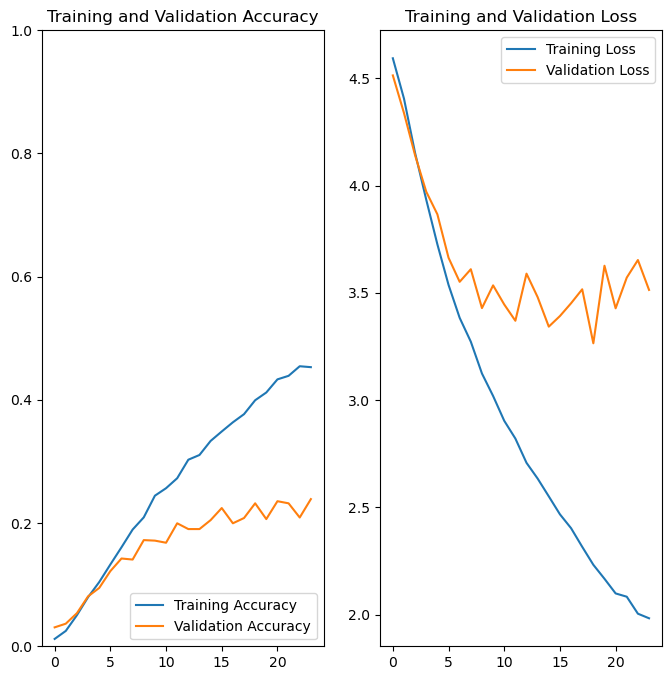

In [12]:
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.ylim(0,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig(run_name + ".png")
plt.show()
